<a href="https://colab.research.google.com/github/cgrundman/ZTM-TensorFlow-Developer/blob/main/03_introduction_to_computer_vision_in_tensorflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer Vision is the practice of writing algorithms which discover patterns in visual data. Such as the cameras of a self-driving car recognizing the car in front.



## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-11-16 08:04:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0d::cf, 2607:f8b0:4023:c06::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   227MB/s    in 0.5s    

2023-11-16 08:04:40 (227 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a machine learning project this means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/train/steak | head -10

1000205.jpg
100135.jpg
101312.jpg
1021458.jpg
1032846.jpg
10380.jpg
1049459.jpg
1053665.jpg
1068516.jpg
1068975.jpg


In [6]:
import os

# Walk through pizza_steak directory and list the number of files
for dirpath, dirnames, filenames, in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, let's get the class names programmatically.

In [8]:
# Get the class anmes programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the btarget image directory (we'll view imagews from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape {img.shape}")

  return img

['741883.jpg']
Image shape (512, 512, 3)


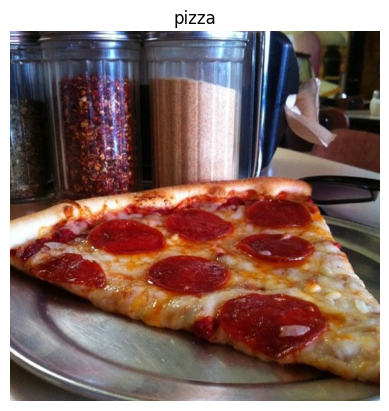

In [10]:
# View a random image from the training data set
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [11]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[136, 149, 219],
        [146, 159, 229],
        [156, 169, 239],
        ...,
        [ 28,  18,   6],
        [ 27,  17,   5],
        [ 27,  17,   5]],

       [[153, 168, 227],
        [162, 177, 236],
        [171, 186, 245],
        ...,
        [ 29,  19,   7],
        [ 29,  19,   7],
        [ 28,  18,   6]],

       [[116, 131, 172],
        [124, 139, 180],
        [132, 147, 188],
        ...,
        [ 30,  20,   8],
        [ 29,  19,   7],
        [ 29,  19,   7]],

       ...,

       [[217, 206, 200],
        [208, 197, 191],
        [194, 183, 177],
        ...,
        [112, 143, 164],
        [115, 145, 169],
        [119, 151, 174]],

       [[220, 210, 201],
        [216, 206, 197],
        [205, 195, 186],
        ...,
        [128, 162, 190],
        [136, 169, 200],
        [145, 180, 212]],

       [[217, 207, 198],
        [219, 209, 200],
        [215, 205, 196],
        ...,
        [148, 183, 21

In [12]:
# View the image shape
img.shape

(512, 512, 3)

In [13]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.53333333, 0.58431373, 0.85882353],
        [0.57254902, 0.62352941, 0.89803922],
        [0.61176471, 0.6627451 , 0.9372549 ],
        ...,
        [0.10980392, 0.07058824, 0.02352941],
        [0.10588235, 0.06666667, 0.01960784],
        [0.10588235, 0.06666667, 0.01960784]],

       [[0.6       , 0.65882353, 0.89019608],
        [0.63529412, 0.69411765, 0.9254902 ],
        [0.67058824, 0.72941176, 0.96078431],
        ...,
        [0.11372549, 0.0745098 , 0.02745098],
        [0.11372549, 0.0745098 , 0.02745098],
        [0.10980392, 0.07058824, 0.02352941]],

       [[0.45490196, 0.51372549, 0.6745098 ],
        [0.48627451, 0.54509804, 0.70588235],
        [0.51764706, 0.57647059, 0.7372549 ],
        ...,
        [0.11764706, 0.07843137, 0.03137255],
        [0.11372549, 0.0745098 , 0.02745098],
        [0.11372549, 0.0745098 , 0.02745098]],

       ...,

       [[0.85098039, 0.80784314, 0.78431373],
        [0.81568627, 0.77254902, 0.74901961],
        [0.76078431, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed
tf.random.set_seed(42)

# Preprocess our data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 17s 133ms/step - loss: 0.6798 - accuracy: 0.6047 - val_loss: 0.5054 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 5s 113ms/step - loss: 0.4947 - accuracy: 0.7740 - val_loss: 0.4053 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 6s 121ms/step - loss: 0.4525 - accuracy: 0.7920 - val_loss: 0.3789 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 7s 147ms/step - loss: 0.4304 - accuracy: 0.8200 - val_loss: 0.3656 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4179 - accuracy: 0.8173 - val_loss: 0.3782 - val_accuracy: 0.8420


In [15]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   